In [1]:
import subprocess
import os
import sys
import matplotlib.backends.backend_pdf
import scanpy as sc
import matplotlib.pyplot as pl
import anndata as ad
import pandas as pd
import numpy as np
import seaborn as sns
import scvelo as scv
scv.settings.verbosity=1

# Jupyter stuff
from tqdm.notebook import tqdm
from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

%matplotlib inline

In [2]:
# Custom functions
sys.path.insert(1, '../..')
from utils import *

# scperturb package
sys.path.insert(1, '../../package/src/')
from scperturb import *

# Define data

In [3]:
h5_files = {}
spath = '/fast/scratch/users/peidlis_c/perturbation_resource_paper/'
for path, subdirs, files in os.walk(spath):
    for name in files:
        if '.h5' in name: h5_files[name[:-3]] = os.path.join(path, name)
print(len(h5_files))
# list(h5_files.keys())

41


In [4]:
dataset = 'PapalexiSatija2021_eccite_RNA'
control = 'control'
groupby = 'perturbation'

# Temp

In [5]:
adata = sc.read(h5_files[f'tmp_data_{dataset}'])

In [ ]:
tab=etest(adata, runs=10)

 70%|███████   | 7/10 [00:52<00:22,  7.50s/it]

# Dependence on HVGs

In [95]:
adata = sc.read(h5_files[f'tmp_data_{dataset}'])

In [9]:
eds = []
ns = np.linspace(2, adata.n_vars, num=10)
for n in tqdm(ns):
    sc.pp.highly_variable_genes(adata, n_top_genes=int(n), flavor='seurat_v3', layer='counts')
    sc.pp.pca(adata)
    ed = edist(adata, groupby, verbose=False)
    eds.append(ed)

100%|██████████| 10/10 [04:56<00:00, 29.61s/it]


In [17]:
df = pd.DataFrame([ed.loc[control] for ed in eds], index=np.array(ns, dtype=int), columns=ed.columns)
df

,control,IFNGR2g1,ATF2g1,IFNGR1g3,CD86g1,IFNGR2g2,POU2F2g1,JAK2g2,IFNGR1g2,TNFRSF14g1,...,IRF7g3,ATF2g3,PDCD1LG2g2,STAT3g4,STAT3g2,STAT2g4,BRD4g1,SMAD4g3,IRF7g4,STAT1g1
2,0.0,-0.017908,0.378350,-0.014210,0.153332,-0.014979,0.373936,0.024216,0.000607,0.127449,...,0.041734,0.117645,0.125528,0.039484,0.089629,0.165059,0.771503,0.206525,0.149978,-0.004701
1778,0.0,143.148249,2.080434,132.392489,0.091781,80.658639,1.651397,116.683976,77.070656,-2.070293,...,3.236542,-0.639088,0.909065,7.498347,1.234756,16.859532,80.267183,67.192706,2.335077,144.392177
3554,0.0,188.351288,1.547960,170.375437,0.621779,104.367688,1.709657,149.658126,99.999165,-2.390807,...,4.659978,-0.443702,0.646312,11.808815,1.846125,22.374055,106.022186,86.358824,3.175659,193.946067
5330,0.0,216.144801,1.648712,196.229512,1.254154,120.795745,1.821405,171.433685,116.029719,-2.520215,...,5.596566,-0.723220,-0.036202,14.855666,2.324541,25.206018,118.024070,94.604175,3.491628,223.660845
7106,0.0,227.052001,1.396057,207.427879,1.522662,127.874382,1.690548,181.370432,122.933143,-2.819206,...,5.318894,-0.910618,0.051466,15.994279,2.233338,25.667234,125.921399,99.645532,3.508548,234.021940
8882,0.0,236.416235,1.156259,214.291718,1.492581,132.518714,1.485257,186.998503,128.104697,-2.720929,...,6.163613,-0.550492,-0.018723,16.970386,2.525087,28.035710,135.557588,103.834964,4.107643,245.615435
10658,0.0,244.262565,0.947074,222.269982,2.493038,137.636220,1.361225,193.163481,133.212168,-2.759680,...,6.488663,-0.429714,-0.124949,18.442094,2.722625,29.112937,147.584132,109.233765,3.790177,255.093377
12434,0.0,249.206146,0.721236,226.329858,2.689119,139.758870,0.996141,195.823368,136.128084,-2.972076,...,5.981155,-0.706982,-0.730370,19.131795,2.253451,29.313767,156.365429,111.816896,3.673263,259.321577
14210,0.0,269.719718,0.748635,244.252089,3.263164,151.964634,0.946893,209.584017,147.882134,-3.058118,...,7.076523,-0.567368,-1.102212,21.237796,2.213774,31.360245,171.184826,118.496353,4.039976,284.064201
15987,0.0,330.281111,-0.580631,292.416921,6.310720,183.874403,-0.955400,245.198016,182.140195,-4.114735,...,8.566301,-0.226506,-1.572911,28.724478,2.259729,41.069962,236.084248,137.577032,5.591049,361.408408


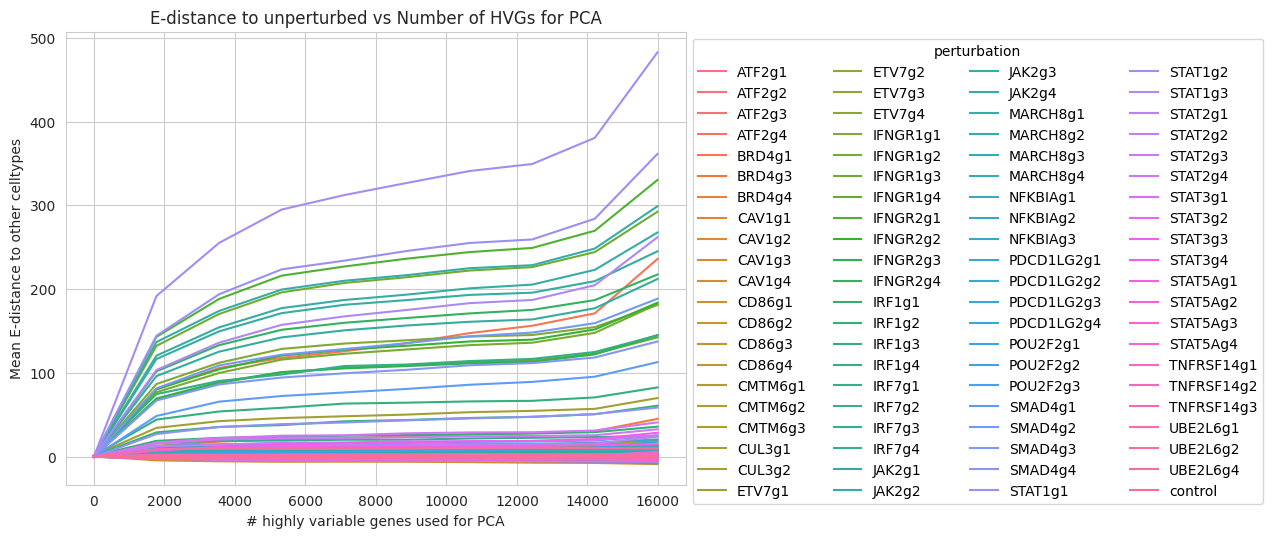

In [31]:
with sns.axes_style('whitegrid'):
    fig, ax = pl.subplots(1, 1, figsize=(8,6), dpi=100)
plot=sns.lineplot(data=df.stack().reset_index(), x='level_0', y=0, hue='level_1', ax=ax)
ax.set_ylabel('Mean E-distance to other celltypes')
ax.set_xlabel('# highly variable genes used for PCA')
ax.set_title('E-distance to unperturbed vs Number of HVGs for PCA')
med_df=df.median(1)
ax.plot(med_df.index, med_df.values, label='median line', linewidth=6, color='black')

h,l = plot.axes.get_legend_handles_labels()
plot.axes.legend_.remove()
ax.legend(h,l, ncol=4, bbox_to_anchor=(1,1), title=groupby)

pl.show()

# Dependence on number of PCs

In [74]:
adata = sc.read(h5_files[f'tmp_data_{dataset}'])

In [ ]:
n_max =100
sc.pp.pca(adata, use_highly_variable=False, n_comps=n_max)

In [82]:
eds = []
ns = [100, 50, 30, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
for n in tqdm(ns):
    adata.obsm['X_pca_sub'] = adata.obsm['X_pca'][:, :int(n)]
    ed = edist(adata, groupby, verbose=False, obsm_key='X_pca_sub')
    eds.append(ed)

100%|██████████| 13/13 [04:07<00:00, 19.04s/it]


In [83]:
df = pd.DataFrame([ed.loc[control] for ed in eds], index=np.array(ns, dtype=int), columns=ed.columns)
df

,control,IFNGR2g1,ATF2g1,IFNGR1g3,CD86g1,IFNGR2g2,POU2F2g1,JAK2g2,IFNGR1g2,TNFRSF14g1,...,IRF7g3,ATF2g3,PDCD1LG2g2,STAT3g4,STAT3g2,STAT2g4,BRD4g1,SMAD4g3,IRF7g4,STAT1g1
100,0.0,331.625911,-0.403313,292.075207,8.122555,185.137765,-0.120542,245.666158,182.285538,-4.446192,...,10.776129,0.619998,-0.559024,30.820739,3.105021,43.947839,251.855610,144.288979,5.787831,364.295138
50,0.0,330.280945,-0.580644,292.416840,6.310696,183.874314,-0.955393,245.197852,182.140119,-4.114732,...,8.566305,-0.226544,-1.572891,28.724447,2.259727,41.070003,236.084284,137.577107,5.591052,361.408152
30,0.0,328.328719,-1.739816,290.074594,4.282110,183.032202,-0.987204,241.173462,181.348494,-3.772505,...,6.615424,-0.338140,-3.063793,28.750497,1.173161,38.587932,214.213476,121.292231,5.408699,359.112425
10,0.0,322.357481,-3.200891,269.136027,3.471322,178.041841,-0.724182,226.074808,173.930487,-3.689457,...,6.520785,0.651971,-4.284113,23.513475,-2.364927,12.808094,164.353200,98.270317,0.535235,349.193774
9,0.0,322.430402,-3.665595,269.897365,3.430153,178.339696,-1.454787,226.751878,173.892796,-3.877732,...,5.041550,0.796123,-3.466499,19.460229,-3.658153,13.430890,163.380871,98.904307,0.672967,349.427938
8,0.0,315.030912,-2.950504,252.698854,4.229909,176.094800,-2.056528,219.609476,164.051430,-3.616303,...,3.969234,1.294236,-3.742187,18.691169,-4.788134,13.696872,163.656072,97.759067,1.181904,346.648202
7,0.0,313.910502,-4.538015,251.804839,4.937469,176.842764,-3.183400,216.435097,164.738030,-3.081371,...,4.801286,-1.513319,-3.239465,18.261955,-6.059396,12.636678,157.775108,65.900520,0.036231,343.802977
6,0.0,304.706664,-4.138129,244.780443,2.786127,177.524623,-5.331813,213.657453,165.287722,-2.256675,...,5.489190,-0.458689,-7.645156,19.186879,-6.785056,12.977785,157.873301,60.915677,-4.739857,343.657379
5,0.0,290.095650,-3.462136,227.787072,3.504928,157.043063,-4.997071,199.258129,157.167391,-2.058077,...,6.335536,-0.703182,-7.369527,20.018222,-6.033981,13.556395,135.894077,57.877989,-3.989435,327.802238
4,0.0,291.398944,-2.953356,228.059551,5.102971,158.901001,-5.043044,198.766023,158.748377,-1.272233,...,-0.463472,0.963032,-6.104911,4.763530,-5.363934,11.481753,133.777908,48.216783,-2.762632,329.317441


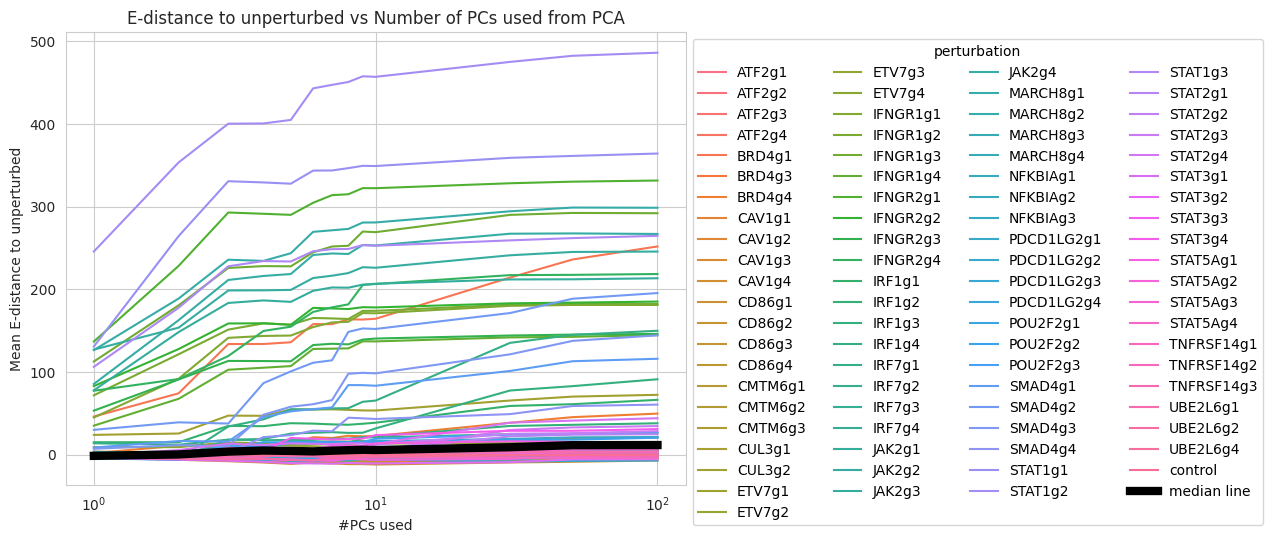

In [85]:
with sns.axes_style('whitegrid'):
    fig, ax = pl.subplots(1, 1, figsize=(8,6), dpi=100)
plot=sns.lineplot(data=df.stack().reset_index(), x='level_0', y=0, hue='level_1', ax=ax)
ax.set_ylabel('Mean E-distance to unperturbed')
ax.set_xlabel('#PCs used')
ax.set_xscale('log')
ax.set_title('E-distance to unperturbed vs Number of PCs used from PCA')
med_df=df.median(1)
ax.plot(med_df.index, med_df.values, label='median line', linewidth=6, color='black')

h,l = plot.axes.get_legend_handles_labels()
plot.axes.legend_.remove()
ax.legend(h,l, ncol=4, bbox_to_anchor=(1,1), title=groupby)

pl.show()

# Dependence on number of cells

In [32]:
adata = sc.read(h5_files[f'tmp_data_{dataset}'])

In [33]:
eds = []
ncells = []
ns = np.linspace(0.05, 1, num=10)
for n in tqdm(ns):
    tdata = sc.pp.subsample(adata, fraction=n, copy=True)
    sc.pp.pca(tdata, use_highly_variable=False)
    ed = edist(tdata, groupby, verbose=False)
    eds.append(ed)
    ncells.append(tdata.obs[groupby].value_counts())

100%|██████████| 10/10 [04:51<00:00, 29.16s/it]


In [44]:
df = pd.DataFrame([ed.loc[control] for ed in eds], index=np.array(ns, dtype=float), columns=ed.columns)
df.head()

,ETV7g4,STAT1g2,PDCD1LG2g1,IFNGR2g1,BRD4g4,STAT5Ag3,CAV1g3,JAK2g4,JAK2g1,IFNGR1g3,...,CD86g1,ETV7g2,NFKBIAg1,PDCD1LG2g4,IRF7g2,IRF1g2,STAT5Ag1,UBE2L6g2,IFNGR2g2,NFKBIAg2
0.050000,-92.135129,1286.298068,-149.995626,1085.172396,276.821368,6.793065,133.728722,709.695188,383.681328,991.607810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.155556,-20.024578,422.084072,0.143190,368.873915,89.736204,-49.751166,-22.793617,336.800619,403.056539,557.556364,...,25.552506,-48.101924,13.409270,-89.116764,15.888747,100.540943,40.708011,-56.881496,109.925769,62.070298
0.261111,-40.136172,419.802566,9.532567,322.079309,75.927053,-41.321894,6.451547,372.476908,169.135257,377.444577,...,-20.492354,-30.417066,26.108820,-14.862830,57.689063,100.011716,-21.175267,-53.927207,264.234745,-24.578528
0.366667,-12.930657,511.918745,13.350899,339.683767,58.426740,14.316697,14.813605,368.029728,241.178127,386.879426,...,7.127854,-13.121167,13.455491,1.034222,4.410986,40.557995,22.315390,-4.134013,243.258575,48.576141
0.472222,-0.906334,430.382397,-12.579074,333.914922,51.732843,5.024324,-5.118837,329.638378,191.424710,349.858379,...,10.771465,-9.860731,-11.085004,-10.918728,2.215219,37.857911,-1.944350,-12.061766,204.413637,41.076472


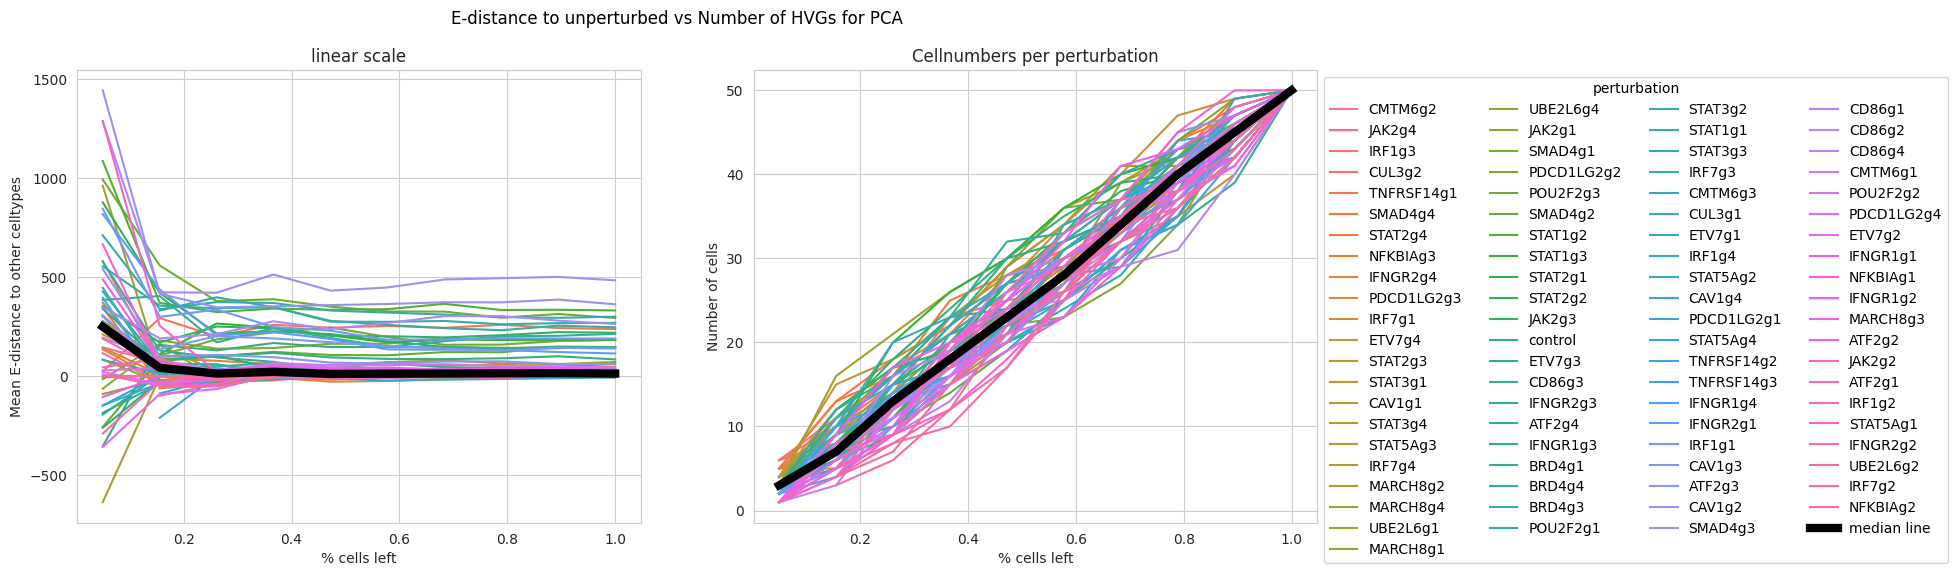

In [50]:
with sns.axes_style('whitegrid'):
    fig, axs = pl.subplots(1, 2, figsize=(8*2,6), dpi=100)
ax=axs[0]
sns.lineplot(data=df.stack().reset_index(), x='level_0', y=0, hue='level_1', ax=ax, legend=ax==axs[-1])
ax.set_ylabel('Mean E-distance to other celltypes')
ax.set_xlabel('% cells left')
ax.set_title('linear scale')
med_df=df.median(1)
ax.plot(med_df.index, med_df.values, label='median line', linewidth=6, color='black')

ax=axs[1]
ndf = pd.DataFrame(ncells, index=ns)
plot=sns.lineplot(data=ndf.stack().reset_index(), x='level_0', y=0, hue='level_1', ax=ax, legend=ax==axs[-1])
ax.set_ylabel('Number of cells')
ax.set_xlabel('% cells left')
ax.set_title('Cellnumbers per '+groupby)
med_ndf=ndf.median(1)
ax.plot(med_ndf.index, med_ndf.values, label='median line', linewidth=6, color='black')

h,l = plot.axes.get_legend_handles_labels()
plot.axes.legend_.remove()
ax.legend(h,l, ncol=4, bbox_to_anchor=(1,1), title=groupby)

pl.suptitle('E-distance to unperturbed vs Number of Cells for PCA')

pl.show()

# Dependence on counts

In [63]:
adata = sc.read(h5_files[f'tmp_data_{dataset}'])
adata.X = adata.layers['counts'].copy()  # reset

In [64]:
eds = []
ncounts = []
ns = np.linspace(0.01, 1, num=10)
total_counts = np.sum(adata.X>0)
for n in tqdm(ns):
    tdata = sc.pp.downsample_counts(adata, total_counts=int(n*total_counts), copy=True)
    tdata.obs['ncounts'] = tdata.X.sum(1)
    ncounts.append(tdata.obs.groupby(groupby).mean()['ncounts'])
    sc.pp.normalize_per_cell(tdata)
    sc.pp.log1p(tdata)
    sc.pp.highly_variable_genes(tdata, n_top_genes=2000)
    sc.pp.pca(tdata, use_highly_variable=False)
    ed = edist(tdata, groupby, verbose=False)
    eds.append(ed)

  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:23<03:32, 23.61s/it]

 20%|██        | 2/10 [00:48<03:15, 24.38s/it]

 30%|███       | 3/10 [01:14<02:56, 25.25s/it]

 40%|████      | 4/10 [01:41<02:34, 25.78s/it]

 50%|█████     | 5/10 [02:08<02:11, 26.32s/it]

 60%|██████    | 6/10 [02:35<01:46, 26.64s/it]

 70%|███████   | 7/10 [03:03<01:20, 26.90s/it]

 80%|████████  | 8/10 [03:31<00:54, 27.15s/it]

 90%|█████████ | 9/10 [04:00<00:27, 27.74s/it]

100%|██████████| 10/10 [04:28<00:00, 26.89s/it]


In [65]:
df = pd.DataFrame([ed.loc[control] for ed in eds], index=np.array(ns, dtype=float), columns=ed.columns)
df

,control,IFNGR2g1,ATF2g1,IFNGR1g3,CD86g1,IFNGR2g2,POU2F2g1,JAK2g2,IFNGR1g2,TNFRSF14g1,...,IRF7g3,ATF2g3,PDCD1LG2g2,STAT3g4,STAT3g2,STAT2g4,BRD4g1,SMAD4g3,IRF7g4,STAT1g1
0.01,0.0,0.054382,-0.043592,0.029484,-0.056095,-0.023739,0.011029,0.041387,0.031892,-0.023158,...,-0.024820,0.072180,0.128767,0.023893,0.092249,0.039628,1.241428,0.091019,0.005800,0.129699
0.12,0.0,8.260602,0.201859,9.848544,0.133740,5.039019,0.128140,7.099472,6.831970,-0.164652,...,2.745002,2.495499,1.675657,2.236411,2.139973,3.557825,8.810797,6.607826,2.368684,17.717513
0.23,0.0,18.693179,0.549226,20.771569,0.076475,11.734795,0.549959,15.849663,14.400556,0.286118,...,5.792316,4.901288,4.210756,6.913358,5.093600,7.633467,17.405439,14.356389,5.241041,35.267332
0.34,0.0,30.465336,1.396066,31.783745,0.328141,18.063090,-0.002722,24.051521,22.918806,-0.118202,...,7.928482,8.123242,7.780645,10.442368,8.345868,12.054217,27.944930,22.520660,7.864423,52.773659
0.45,0.0,41.772322,2.029939,42.982342,0.187159,24.720144,-0.374230,31.864824,29.758546,0.018074,...,11.794690,12.036023,11.283021,15.348391,12.717958,16.045449,38.632156,32.530673,9.725551,69.925294
0.56,0.0,53.658977,2.795865,52.978191,0.789164,30.933498,0.177350,39.934966,36.593831,0.316657,...,16.634710,16.912034,16.084623,20.409091,18.275605,21.574666,51.511307,43.196703,12.920468,86.392852
0.67,0.0,64.841092,2.004749,63.783420,0.486142,37.332418,0.170887,48.281709,43.139316,-0.031870,...,19.577408,20.816420,20.481266,25.617681,23.080371,27.364938,64.828893,53.938615,16.059496,103.097478
0.78,0.0,76.700842,1.845539,74.708499,0.467039,44.156474,0.261078,57.232579,49.185627,0.070770,...,23.968143,26.534983,26.352900,31.046657,28.585272,33.874230,79.776497,63.782226,19.316151,121.905474
0.89,0.0,87.229689,1.673362,83.755352,0.506195,49.973973,0.061909,65.222877,54.350028,-0.421080,...,28.272243,31.998539,32.118175,36.750557,34.931327,40.398459,96.628924,74.671434,22.953884,140.124914
1.00,0.0,98.507446,2.134234,94.810440,1.196401,56.423658,-0.324189,73.029522,60.628432,-0.232023,...,33.027356,39.698379,39.177956,43.961970,43.203684,48.920849,115.697127,87.006474,27.126763,159.873219


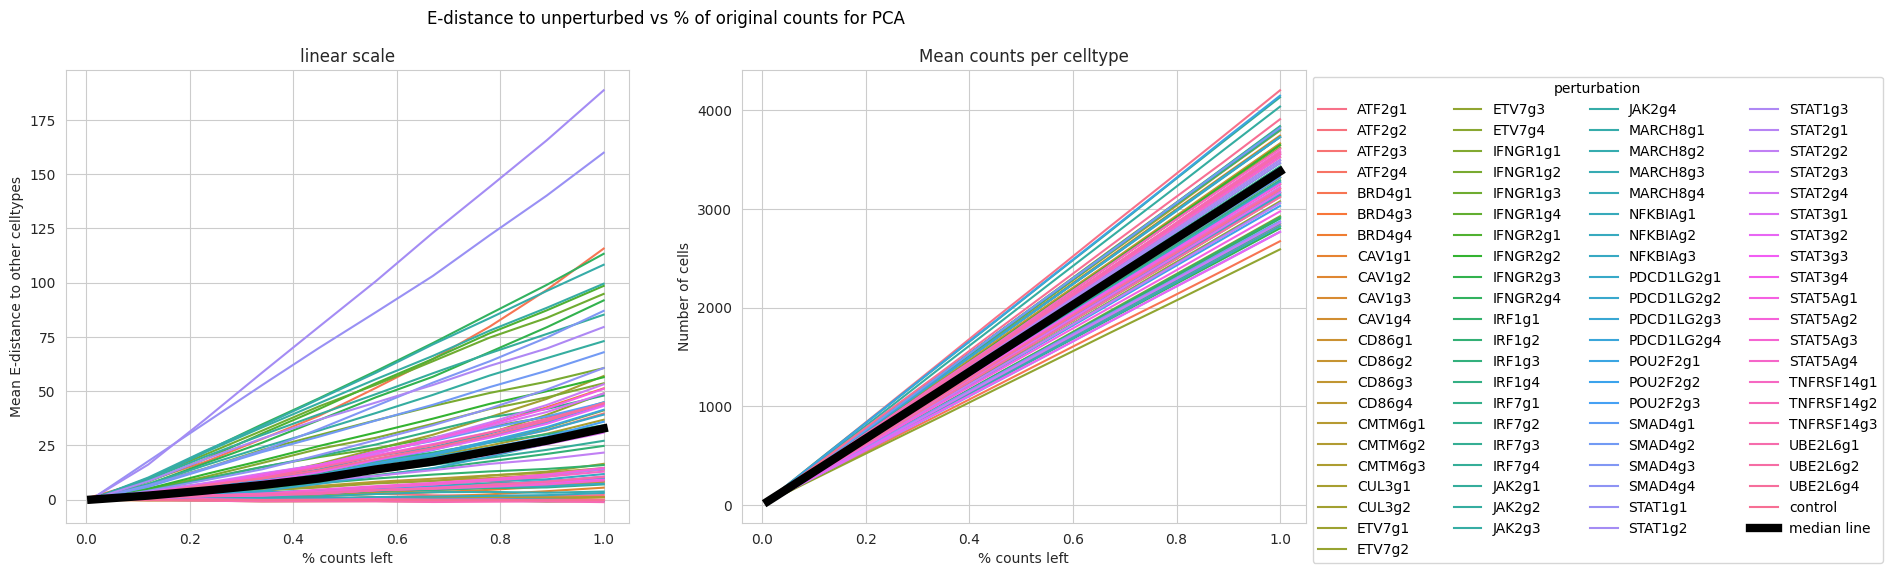

In [73]:
with sns.axes_style('whitegrid'):
    fig, axs = pl.subplots(1, 2, figsize=(8*2,6), dpi=100)
ax=axs[0]
plot=sns.lineplot(data=df.stack().reset_index(), x='level_0', y=0, hue='level_1', ax=ax, legend=ax==axs[-1])
ax.set_ylabel('Mean E-distance to other celltypes')
ax.set_xlabel('% counts left')
ax.set_title('linear scale')
med_df=df.median(1)
ax.plot(med_df.index, med_df.values, label='median line', linewidth=6, color='black')

ax=axs[1]
ndf = pd.DataFrame(ncounts, index=ns)
plot=sns.lineplot(data=ndf.stack().reset_index(), x='level_0', y=0, hue=groupby, ax=ax, legend=ax==axs[-1])
ax.set_ylabel('Number of cells')
ax.set_xlabel('% counts left')
ax.set_title('Mean counts per celltype')
med_ndf=ndf.median(1)
ax.plot(med_ndf.index, med_ndf.values, label='median line', linewidth=6, color='black')
h,l = plot.axes.get_legend_handles_labels()
plot.axes.legend_.remove()
ax.legend(h,l, ncol=4, bbox_to_anchor=(1,1), title=groupby)

pl.suptitle('E-distance to unperturbed vs % of original counts for PCA')

pl.show()

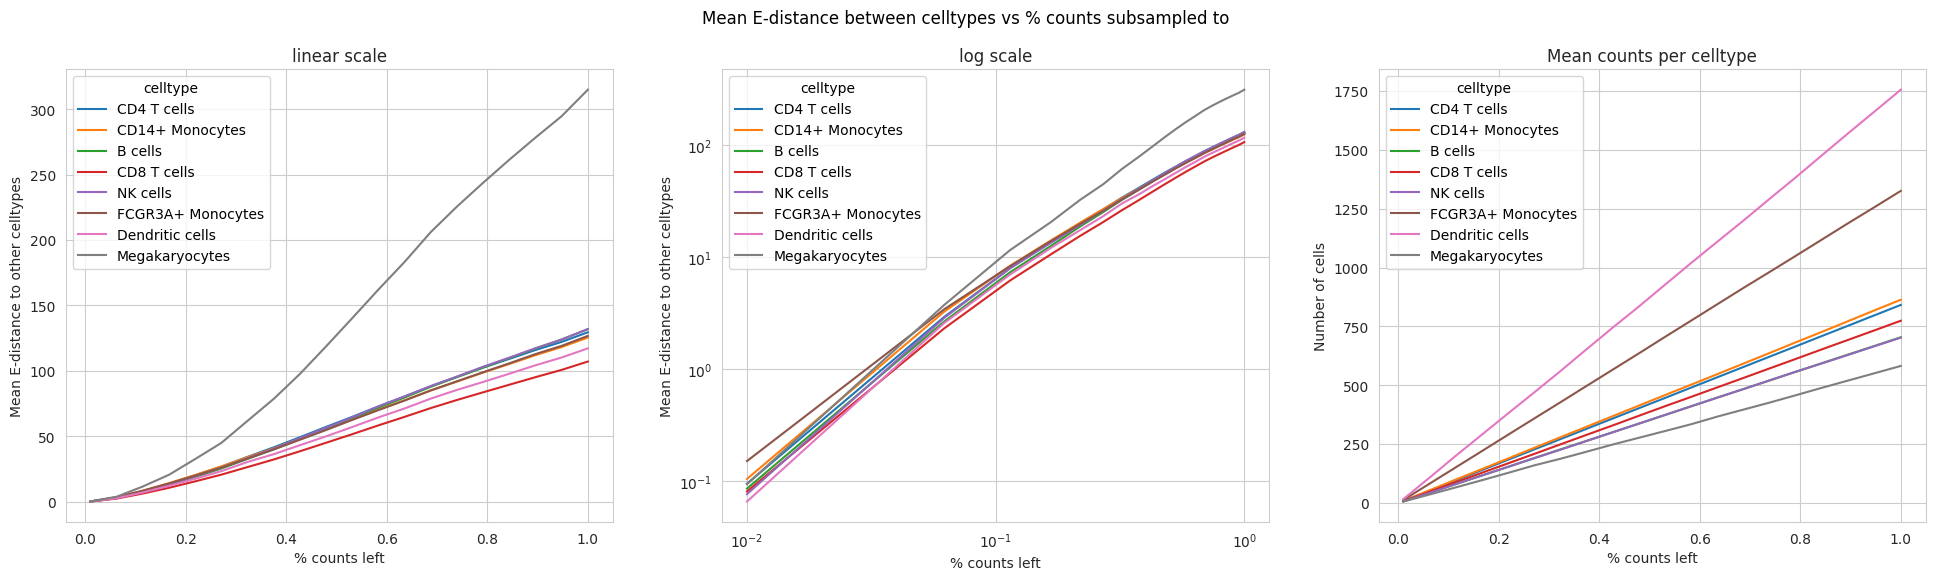

In [186]:
with sns.axes_style('whitegrid'):
    fig, axs = pl.subplots(1, 3, figsize=(8*3,6), dpi=100)
ax=axs[0]
sns.lineplot(data=df.stack().reset_index(), x='level_0', y=0, hue='level_1', ax=ax)
ax.set_ylabel('Mean E-distance to other celltypes')
ax.set_xlabel('% counts left')
ax.legend(title='celltype')
ax.set_title('linear scale')

ax=axs[1]
sns.lineplot(data=df.stack().reset_index(), x='level_0', y=0, hue='level_1', ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Mean E-distance to other celltypes')
ax.set_xlabel('% counts left')
ax.legend(title='celltype')
ax.set_title('log scale')

ax=axs[2]
ndf = pd.DataFrame(ncounts, index=ns)
sns.lineplot(data=ndf.stack().reset_index(), x='level_0', y=0, hue='louvain', ax=ax)
ax.set_ylabel('Number of cells')
ax.set_xlabel('% counts left')
ax.legend(title='celltype')
ax.set_title('Mean counts per celltype')

pl.suptitle('Mean E-distance between celltypes vs % counts subsampled to')

pl.show()